https://www.kaggle.com/datasets/darshanprabhu09/countries-economy-gdp-and-everything

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [253]:
data = pd.read_csv("../data/countries-of-the-world.csv", sep=',',decimal=',')

In [254]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [236]:
X = data[['GDP ($ per capita)', 'Phones (per 1000)', 'Birthrate', 'Deathrate', 'Literacy (%)', 'Agriculture', 'Climate', 'Infant mortality (per 1000 births)']]
# X = data.drop(columns=['Country', 'Region'])
X = SimpleImputer(strategy="mean").fit_transform(X)

In [265]:
data.loc[214]

Country                                                    United States 
Region                                NORTHERN AMERICA                   
Population                                                      298444215
Area (sq. mi.)                                                    9631420
Pop. Density (per sq. mi.)                                           31.0
Coastline (coast/area ratio)                                         0.21
Net migration                                                        3.41
Infant mortality (per 1000 births)                                    6.5
GDP ($ per capita)                                                37800.0
Literacy (%)                                                         97.0
Phones (per 1000)                                                   898.0
Arable (%)                                                          19.13
Crops (%)                                                            0.22
Other (%)                             

In [267]:
data.loc[121]

Country                                                       Luxembourg 
Region                                WESTERN EUROPE                     
Population                                                         474413
Area (sq. mi.)                                                       2586
Pop. Density (per sq. mi.)                                          183.5
Coastline (coast/area ratio)                                          0.0
Net migration                                                        8.97
Infant mortality (per 1000 births)                                   4.81
GDP ($ per capita)                                                55100.0
Literacy (%)                                                        100.0
Phones (per 1000)                                                   515.4
Arable (%)                                                          23.28
Crops (%)                                                             0.4
Other (%)                             

In [269]:
data.loc[2]

Country                                                          Algeria 
Region                                NORTHERN AFRICA                    
Population                                                       32930091
Area (sq. mi.)                                                    2381740
Pop. Density (per sq. mi.)                                           13.8
Coastline (coast/area ratio)                                         0.04
Net migration                                                       -0.39
Infant mortality (per 1000 births)                                   31.0
GDP ($ per capita)                                                 6000.0
Literacy (%)                                                         70.0
Phones (per 1000)                                                    78.1
Arable (%)                                                           3.22
Crops (%)                                                            0.25
Other (%)                             

**Present dataset**

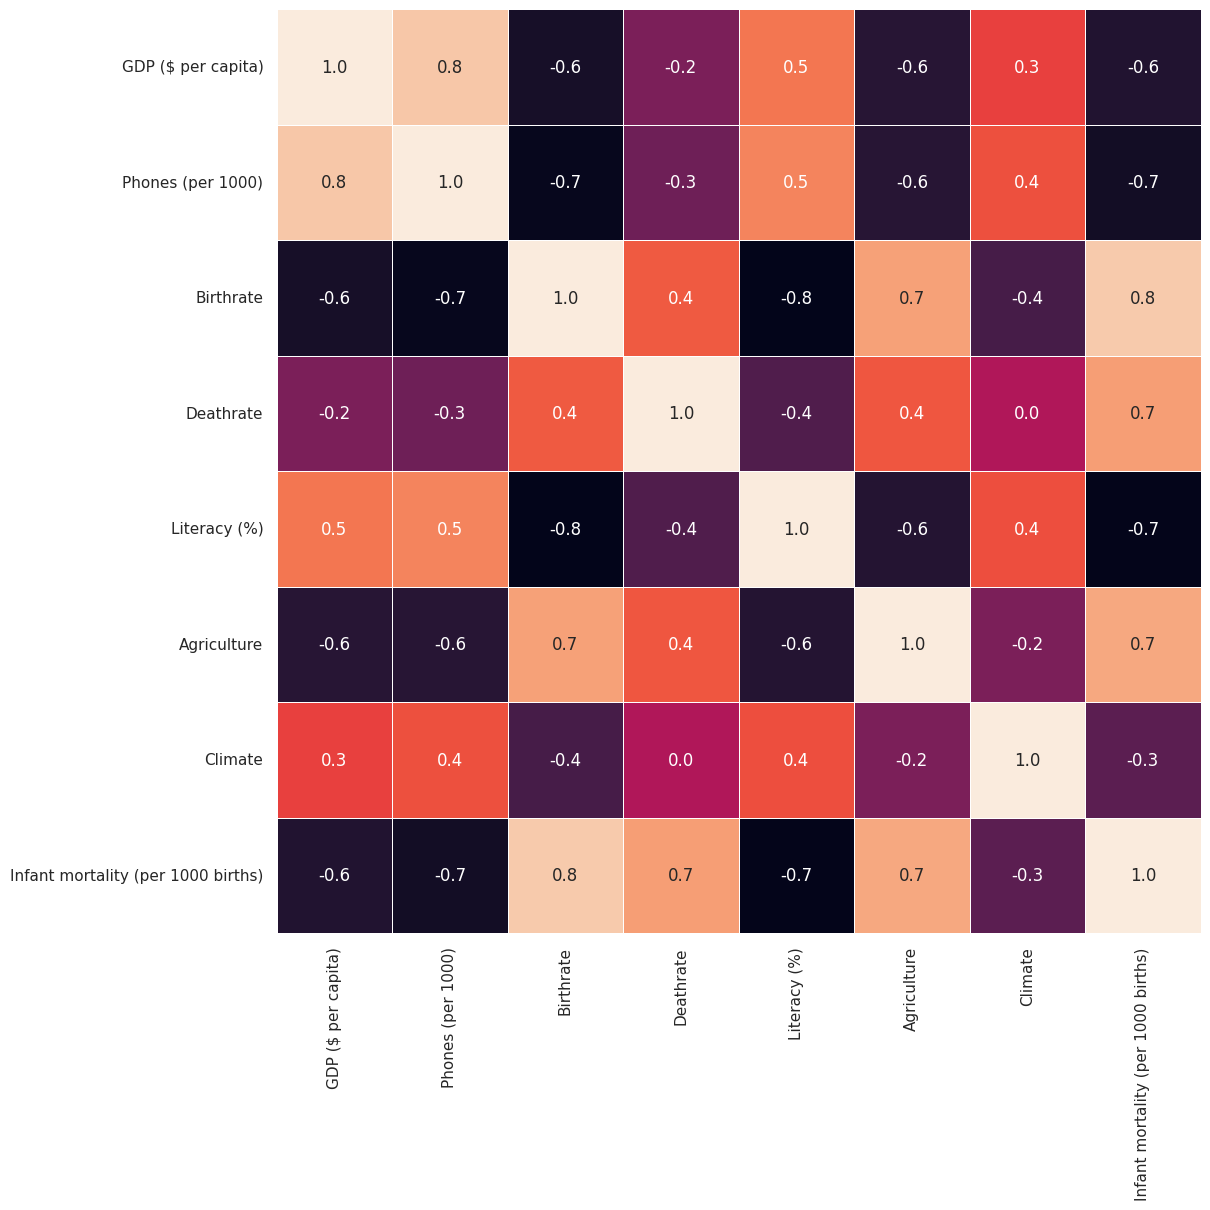

In [237]:
plt.figure(figsize=(12,12))
sns.set_theme(style="white")
sns.heatmap(X.corr(), square=True, linewidths=.5, annot=True, fmt='.1f', cbar=False);

In [238]:
n_clusters = range(2,15)
inertias = []
for i in n_clusters:
    
    kmeans = KMeans(n_clusters=i, n_init="auto").fit(X)
    inertias.append(kmeans.inertia_)

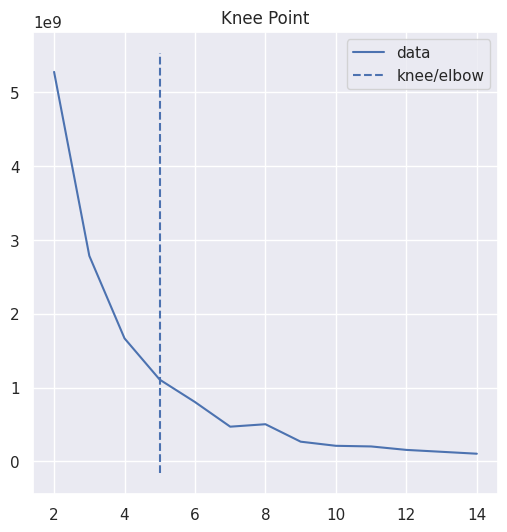

In [239]:
sns.set_theme()
kneedle = KneeLocator(n_clusters, inertias, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()

In [281]:
clustering = KMeans(n_clusters=5, n_init="auto").fit(X)

In [282]:
data["cluster"] = clustering.labels_

In [283]:
silhouette_score(X, clustering.labels_)

0.6163851329530825

In [284]:
np.sum(clustering.labels_ == 4) / clustering.labels_.shape[0]

0.13656387665198239

In [249]:
data[["Country","cluster"]][data["cluster"] == 4]

,Country,cluster
10,Aruba,4
11,Australia,4
12,Austria,4
19,Belgium,4
22,Bermuda,4
36,Canada,4
38,Cayman Islands,4
54,Denmark,4
68,Finland,4
69,France,4


In [285]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html